Environment Requirement: python 3.8; ipykernel, hfst_dev, graphviz

## Setup

In [1]:
import hfst_dev as hfst
import graphviz
import math

In [2]:
# Weights are negative log probabilities
print(-math.log(0.25))
print(-math.log(0.75))
print(-math.log(0.5))

1.3862943611198906
0.2876820724517809
0.6931471805599453


In [3]:
print(-math.log(0.375)) # 3/8
print(-math.log(0.125)) # 1/8
print(-math.log(0.625)) # 5/8
print(-math.log(0.875)) # 7/8

0.9808292530117262
2.0794415416798357
0.4700036292457356
0.13353139262452263


## States

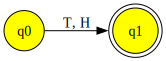

In [4]:
H = hfst.regex('H')
T = hfst.regex('T')
  

defs = {"H":H,"T":T}

St = hfst.regex('H | T',definitions=defs)
defs.update({"St":St})
St.view()

## Actions

In [5]:
# Peeking is going to be construed as fallible
# Accurate peeks
peekamyHH = hfst.regex('[H peekamyHH H]',definitions=defs)
peekamyTT = hfst.regex('[T peekamyTT T]',definitions=defs)
# Inaccurate peeks
peekamyHT = hfst.regex('[H peekamyHT T]',definitions=defs)
peekamyTH = hfst.regex('[T peekamyTH H]',definitions=defs)

peekbobHH = hfst.regex('[H peekbobHH H]',definitions=defs)
peekbobTT = hfst.regex('[T peekbobTT T]',definitions=defs)
peekbobHT = hfst.regex('[H peekbobHT T]',definitions=defs)
peekbobTH = hfst.regex('[T peekbobTH H]',definitions=defs)


peekamyHH.determinize()
peekamyTT.determinize()
peekamyHT.determinize()
peekamyTH.determinize()

peekbobHH.determinize()
peekbobTT.determinize()
peekbobHT.determinize()
peekbobTH.determinize()

In [6]:
#accurate announce
announceHH = hfst.regex('[H announceHH H]',definitions=defs)
announceTT = hfst.regex('[T announceTT T]',definitions=defs)

announceHH.determinize()
announceTT.determinize()




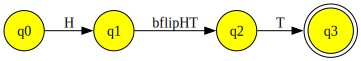

In [7]:
# Flips are going to biased

# Coin stays the same. These will get a higher probability.
bflipHH =  hfst.regex('[H bflipHH H ]',definitions=defs)
bflipTT =  hfst.regex('[T bflipTT T ]',definitions=defs)

# Coin changes.
bflipHT =  hfst.regex('[H bflipHT T ]',definitions=defs)
bflipTH =  hfst.regex('[T bflipTH H ]',definitions=defs)

bflipHH.determinize()
bflipTT.determinize()   
bflipHT.determinize()
bflipTH.determinize()

bflipHT.view()

In [8]:
# These name decorated events
eventdefs = { 
    "peekamyHH":peekamyHH,
    "peekamyTT":peekamyTT,
    "peekamyHT":peekamyHT,
    "peekamyTH":peekamyTH,
    "peekbobHH":peekbobHH,
    "peekbobTT":peekbobTT,
    "peekbobHT":peekbobHT,
    "peekbobTH":peekbobTH,
    "announceHH":announceHH,
    "announceTT":announceTT,
    "bflipHH":bflipHH,
    "bflipTT":bflipTT, 
    "bflipHT":bflipHT,
    "bflipTH":bflipTH }

In [9]:
defs.update(eventdefs)

In [10]:
EventPeekAmy = hfst.regex('[peekamyHH | peekamyTT | peekamyHT | peekamyTH ]', definitions=defs)
EventPeekAmy.determinize()

In [11]:
EventPeekBob = hfst.regex('[peekbobHH | peekbobTT | peekbobHT | peekbobTH ]', definitions=defs)
EventPeekBob.determinize()

In [12]:
EventFlip = hfst.regex('[bflipHH | bflipTT | bflipHT | bflipTH ]', definitions=defs)
EventFlip.determinize()

In [13]:
EventAnnounce = hfst.regex('[announceHH | announceTT ]', definitions=defs)
EventAnnounce.determinize()

In [14]:
defs.update({"EventPeekAmy":EventPeekAmy,"EventPeekBob":EventPeekBob,"EventFlip":EventFlip,"EventAnnounce":EventAnnounce})

In [15]:
Event = EventPeekAmy.copy()
Event.disjunct(EventPeekBob)
Event.disjunct(EventFlip)
Event.disjunct(EventAnnounce)
Event.minimize()

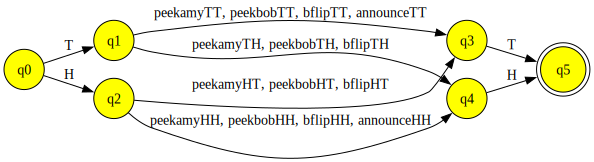

In [16]:
Event.view()

## Functions

In [17]:
# Delete the second state in a block of two states.  This is used defining Ekat concatenation.
Squash = hfst.regex('St -> 0 || St _', definitions = defs)
# Strings that do not contain an unequal state pair
Wf0 = hfst.regex('~[$ UnequalStPair]', definitions = defs)
defs.update({"Squash":Squash,"Wf0":Wf0})

In [18]:
# define Cn(X,Y) [[[X Y] & Wf0] .o. Squash].l;
def Cn(X,Y):
    Z = X.copy()
    Z.concatenate(Y)
    Z.intersect(Wf0)
    Z.compose(Squash)
    Z.output_project()
    #Z.determinize()
    Z.minimize()
    return Z

## Weighted States

In [19]:
threequarter = hfst.regex('St::0.2876820724517809', definitions=defs)
onequarter = hfst.regex('St::1.3862943611198906', definitions=defs)
half = hfst.regex('St::0.6931471805599453', definitions=defs)

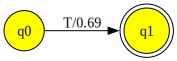

In [20]:
initialH = hfst.regex('H::0.6931471805599453', definitions=defs)
initialT = hfst.regex('T::0.6931471805599453', definitions=defs)
initialH.view()
initialT.view()

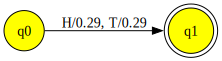

In [21]:
threequarter.view()

## Falliable peeks

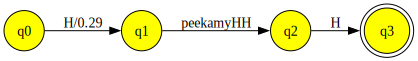

In [22]:
wpeekamyHH = Cn(peekamyHH,threequarter)
wpeekamyHH.view()

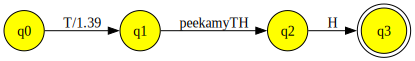

In [23]:
wpeekamyTH = Cn(peekamyTH,onequarter)
wpeekamyTH.view()

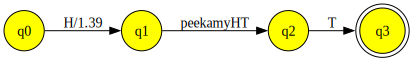

In [24]:
wpeekamyHT = Cn(peekamyHT,onequarter)
wpeekamyHT.view()

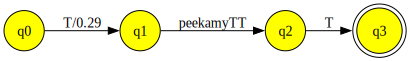

In [25]:
wpeekamyTT = Cn(peekamyTT,threequarter)
wpeekamyTT.view()

In [26]:
weventamydefs = { 
    "wpeekamyHH":wpeekamyHH,
    "wpeekamyTT":wpeekamyTT,
    "wpeekamyHT":wpeekamyHT,
    "wpeekamyTH":wpeekamyTH }
defs.update(weventamydefs)

In [27]:
wpeekbobHH = Cn(peekbobHH,threequarter)
wpeekbobTT = Cn(peekbobTT,threequarter)
wpeekbobHT = Cn(peekbobHT,onequarter)
wpeekbobTH = Cn(peekbobTH,onequarter)
weventbobdefs = { 
    "wpeekbobHH":wpeekbobHH,
    "wpeekbobTT":wpeekbobTT,
    "wpeekbobHT":wpeekbobHT,
    "wpeekbobTH":wpeekbobTH }
defs.update(weventbobdefs)

In [28]:
defs

{'H': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10d8cd690> >,
 'T': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10d8cdb70> >,
 'St': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10d8cde40> >,
 'peekamyHH': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10dae1090> >,
 'peekamyTT': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10dae1120> >,
 'peekamyHT': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10dae11b0> >,
 'peekamyTH': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x10dae1240> >,
 'peekbobHH': <

In [29]:
EventwPeekAmy = hfst.regex('[wpeekamyHH | wpeekamyTT | wpeekamyHT | wpeekamyTH ]', definitions=defs)

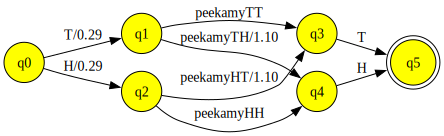

In [30]:
EventwPeekAmy.view() # Is this valid?

In [31]:
math.exp(-0.29)

0.7482635675785653

In [32]:
math.exp(-1.1)

0.33287108369807955

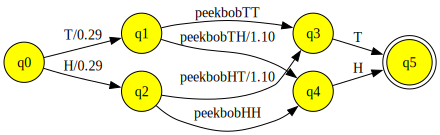

In [33]:
EventwPeekBob = hfst.regex('[wpeekbobHH | wpeekbobTT | wpeekbobHT | wpeekbobTH ]', definitions=defs)
EventwPeekBob.view()  # this is valid because peekbobTH = math.exp(-0.29) * math.exp(-1.10) = 3/4 * 1/3 = 1/4

In [34]:
defs.update({"EventwPeekAmy":EventwPeekAmy,"EventwPeekBob":EventwPeekBob})

## Falliable flips

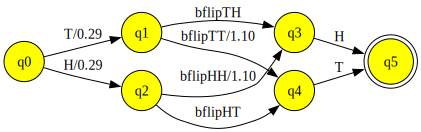

In [35]:
wbflipHT = Cn(bflipHT,threequarter)
wbflipTH = Cn(bflipTH,threequarter)
wbflipHH = Cn(bflipHH,onequarter)
wbflipTT = Cn(bflipTT,onequarter)
weventflipdefs = { 
    "wbflipHT":wbflipHT,
    "wbflipTH":wbflipTH,
    "wbflipHH":wbflipHH,
    "wbflipTT":wbflipTT }
defs.update(weventflipdefs)
EventwFlip = hfst.regex('[wbflipHT | wbflipTH | wbflipHH | wbflipTT ]', definitions=defs)
EventwFlip.view()



## Weghted States x Weighted Events

In [36]:
initialHflips = hfst.regex('[wbflipHT | wbflipHH]', definitions=defs)
initialHpeeks = hfst.regex('[wpeekamyHH | wpeekamyHT | wpeekbobHH | wpeekbobHT]', definitions=defs)

# add weight to above event collections
probinitialHflips = Cn(initialHflips, onequarter)
probinitialHpeeks = Cn(initialHpeeks, half)
probinitialHannounce = Cn(announceHH, onequarter)

In [37]:
probinitialHevents = {
    "probinitialHflips":probinitialHflips,
    "probinitialHpeeks":probinitialHpeeks,
    "probinitialHannounce":probinitialHannounce,
}
defs.update(probinitialHevents)

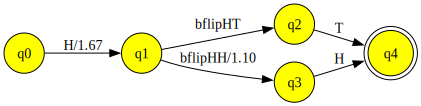

In [38]:
probinitialHflips.view() # flip opposite has probability 3/16 = 1/4 (prob of flipping among all actions) * 3/4 (prob of flipping opposite); flip same = 1/4 * 1/4 = 3/16 * 1/3

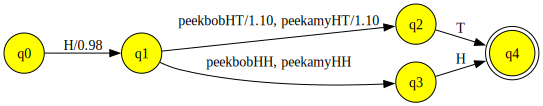

In [39]:
probinitialHpeeks.view() # peek same has 3/8 = 1/2 (probability of peek among all actions) * 3/4 (probability of peeking correctly)

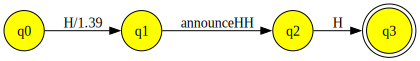

In [40]:
probinitialHannounce.view() # announce has 1/4 = 1/4 (probability of announcing the coin H) * 1 (probability of doing anounceHH if announcing)

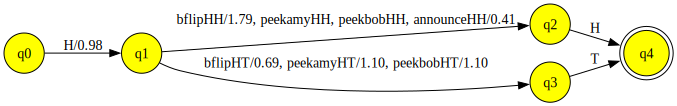

In [41]:
initialHevents = hfst.regex('[probinitialHflips | probinitialHpeeks | probinitialHannounce]', definitions=defs)
initialHevents.view()
# peekamyHH and peekbobHH has 0.98 (which is 3/8 = 1/2 * 3/4)
# peekamyHT and peekbobHT has 0.98*1.10 (which is 3/8 * 1/3 because wrong peek is 1/3 probable compared to correct peek)
# announceHH has 0.98*0.41 (which is 3/8 * 2/3 = 1/4)
# bflipHH has 0.98*1.79 (which is 3/8 * 1/6 = 1/16, equivalent to 1/4 * 1/4 = 1/16)
# bflipHT has 0.98*0.69 (which is 3/8 * 1/2 = 3/16, equivalent to 1/4 * 3/4 = 3/ 16)

In [42]:
winitialHevents = Cn(initialH,initialHevents)

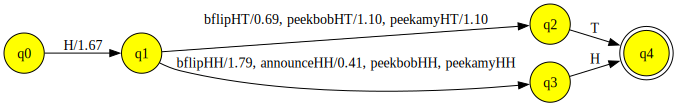

In [43]:
winitialHevents.view()
# the edges from q1 to q2/3 are the same from initialH_events.view()
# only q0-->q1 changes from 0.98 to 1.67 because initial H adds another multiplication *0.5


In [44]:
initialTflips = hfst.regex('[wbflipTH | wbflipTT]', definitions=defs)
initialTpeeks = hfst.regex('[wpeekamyTH | wpeekamyTT | wpeekbobTH | wpeekbobTT]', definitions=defs)

# add weight to above event collections
probinitialTflips = Cn(initialTflips, onequarter)
probinitialTpeeks = Cn(initialTpeeks, half)
probinitialTannounce = Cn(announceTT, onequarter)

In [45]:
probinitialTevents = {
    "probinitialTflips":probinitialTflips,
    "probinitialTpeeks":probinitialTpeeks,
    "probinitialTannounce":probinitialTannounce,
}
defs.update(probinitialTevents)

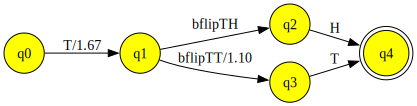

In [46]:
probinitialTflips.view() # flip opposite has probability 3/16 = 1/4 (prob of flipping among all actions) * 3/4 (prob of flipping opposite); flip same = 1/4 * 1/4 = 3/16 * 1/3

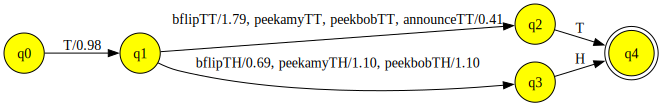

In [47]:
initialTevents = hfst.regex('[probinitialTflips | probinitialTpeeks | probinitialTannounce]', definitions=defs)
initialTevents.view()

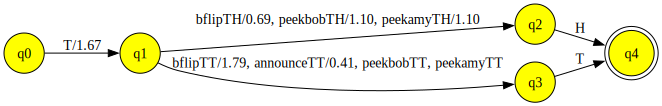

In [48]:
winitialTevents = Cn(initialT,initialTevents)
winitialTevents.view()

In [50]:
singlecoinevents = {
    "winitialHevents": winitialHevents,
    "winitialTevents": winitialTevents,
}
defs.update(singlecoinevents)

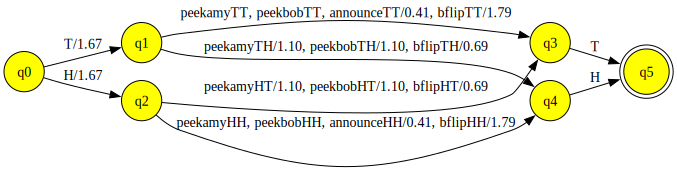

In [52]:
singlecoinevents = hfst.regex("[winitialHevents | winitialTevents]", definitions=defs)
singlecoinevents.view()

## (skip for now) Alternatives

In [31]:
# Unconstrained cross product of the decorated events
# This is used in defining event alternative relations.
eventCrossEvent = Event.copy()
eventCrossEvent.cross_product(Event)

defs.update({"eventCrossEvent": eventCrossEvent})
# Shorter name
defs.update({"eCe": eventCrossEvent})


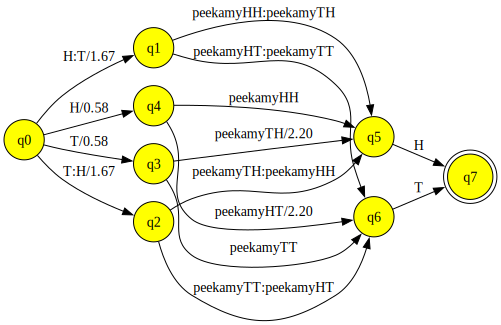

In [32]:
# Amy's alternatives for Amy's own peeks
# Amy can distinguish by what she perceives (the post-state):
#   peekamyHH [H→H] and peekamyTH [T→H]: Amy perceives H → alternatives for each other
#   peekamyTT [T→T] and peekamyHT [H→T]: Amy perceives T → alternatives for each other
amyPeekamyRel = hfst.regex(
    '[wpeekamyHH .o. eCe .o. wpeekamyHH] |' +
    '[wpeekamyHH .o. eCe .o. wpeekamyTH] |' +
    '[wpeekamyTH .o. eCe .o. wpeekamyHH] |' +
    '[wpeekamyTH .o. eCe .o. wpeekamyTH] |' +
    '[wpeekamyTT .o. eCe .o. wpeekamyTT] |' +
    '[wpeekamyTT .o. eCe .o. wpeekamyHT] |' +
    '[wpeekamyHT .o. eCe .o. wpeekamyTT] |' +
    '[wpeekamyHT .o. eCe .o. wpeekamyHT]',
    definitions=defs)
amyPeekamyRel.view()


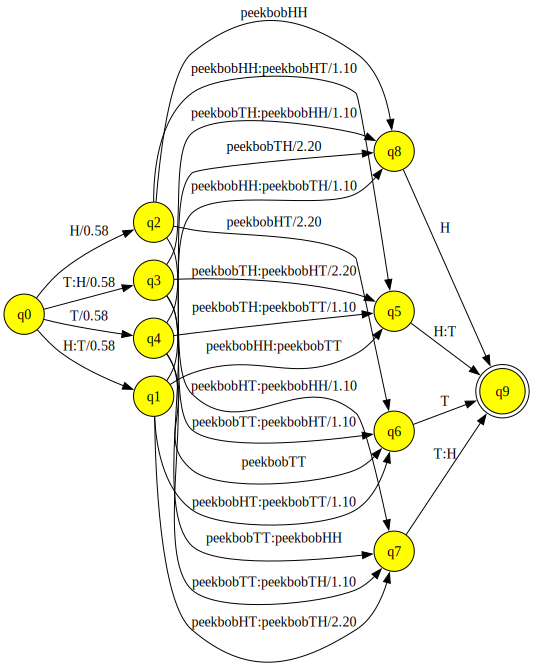

In [33]:
# Amy's alternatives for Bob's peeks
# Amy cannot observe Bob's peek, so all of Bob's peek events
# are indistinguishable to her (full cross product).
amyPeekbobRel = hfst.regex(
    '[wpeekbobHH .o. eCe .o. wpeekbobHH] |' +
    '[wpeekbobHH .o. eCe .o. wpeekbobTT] |' +
    '[wpeekbobHH .o. eCe .o. wpeekbobHT] |' +
    '[wpeekbobHH .o. eCe .o. wpeekbobTH] |' +
    '[wpeekbobTT .o. eCe .o. wpeekbobHH] |' +
    '[wpeekbobTT .o. eCe .o. wpeekbobTT] |' +
    '[wpeekbobTT .o. eCe .o. wpeekbobHT] |' +
    '[wpeekbobTT .o. eCe .o. wpeekbobTH] |' +
    '[wpeekbobHT .o. eCe .o. wpeekbobHH] |' +
    '[wpeekbobHT .o. eCe .o. wpeekbobTT] |' +
    '[wpeekbobHT .o. eCe .o. wpeekbobHT] |' +
    '[wpeekbobHT .o. eCe .o. wpeekbobTH] |' +
    '[wpeekbobTH .o. eCe .o. wpeekbobHH] |' +
    '[wpeekbobTH .o. eCe .o. wpeekbobTT] |' +
    '[wpeekbobTH .o. eCe .o. wpeekbobHT] |' +
    '[wpeekbobTH .o. eCe .o. wpeekbobTH]',
    definitions=defs)
amyPeekbobRel.view()


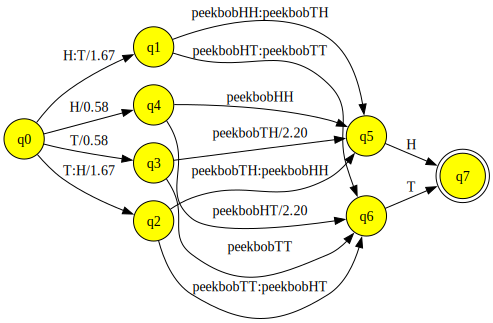

In [34]:
# Bob's alternatives for Bob's own peeks
# Bob can distinguish by what he perceives (the post-state):
#   peekbobHH [H→H] and peekbobTH [T→H]: Bob perceives H → alternatives for each other
#   peekbobTT [T→T] and peekbobHT [H→T]: Bob perceives T → alternatives for each other
bobPeekbobRel = hfst.regex(
    '[wpeekbobHH .o. eCe .o. wpeekbobHH] |' +
    '[wpeekbobHH .o. eCe .o. wpeekbobTH] |' +
    '[wpeekbobTH .o. eCe .o. wpeekbobHH] |' +
    '[wpeekbobTH .o. eCe .o. wpeekbobTH] |' +
    '[wpeekbobTT .o. eCe .o. wpeekbobTT] |' +
    '[wpeekbobTT .o. eCe .o. wpeekbobHT] |' +
    '[wpeekbobHT .o. eCe .o. wpeekbobTT] |' +
    '[wpeekbobHT .o. eCe .o. wpeekbobHT]',
    definitions=defs)
bobPeekbobRel.view()


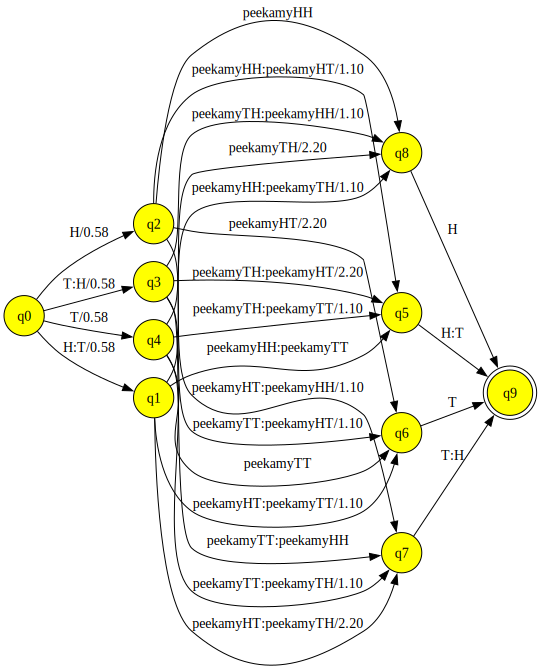

In [35]:
# Bob's alternatives for Amy's peeks
# Bob cannot observe Amy's peek, so all of Amy's peek events
# are indistinguishable to him (full cross product).
bobPeekamyRel = hfst.regex(
    '[wpeekamyHH .o. eCe .o. wpeekamyHH] |' +
    '[wpeekamyHH .o. eCe .o. wpeekamyTT] |' +
    '[wpeekamyHH .o. eCe .o. wpeekamyHT] |' +
    '[wpeekamyHH .o. eCe .o. wpeekamyTH] |' +
    '[wpeekamyTT .o. eCe .o. wpeekamyHH] |' +
    '[wpeekamyTT .o. eCe .o. wpeekamyTT] |' +
    '[wpeekamyTT .o. eCe .o. wpeekamyHT] |' +
    '[wpeekamyTT .o. eCe .o. wpeekamyTH] |' +
    '[wpeekamyHT .o. eCe .o. wpeekamyHH] |' +
    '[wpeekamyHT .o. eCe .o. wpeekamyTT] |' +
    '[wpeekamyHT .o. eCe .o. wpeekamyHT] |' +
    '[wpeekamyHT .o. eCe .o. wpeekamyTH] |' +
    '[wpeekamyTH .o. eCe .o. wpeekamyHH] |' +
    '[wpeekamyTH .o. eCe .o. wpeekamyTT] |' +
    '[wpeekamyTH .o. eCe .o. wpeekamyHT] |' +
    '[wpeekamyTH .o. eCe .o. wpeekamyTH]',
    definitions=defs)
bobPeekamyRel.view()


In [36]:
defs.update({
    "amyPeekamyRel": amyPeekamyRel,
    "amyPeekbobRel": amyPeekbobRel,
    "bobPeekbobRel": bobPeekbobRel,
    "bobPeekamyRel": bobPeekamyRel
})


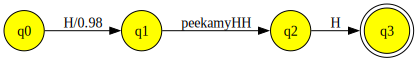

In [37]:
w_HpeekamyHH = Cn(initial_H,wpeekamyHH)
w_HpeekamyHH.view() # 1/2 * 3/4 = 3/8

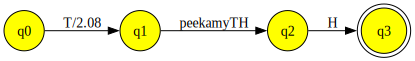

In [38]:
w_TpeekamyTH = Cn(initial_T,wpeekamyTH)
w_TpeekamyTH.view() # 1/2 * 1/4 = 1/8

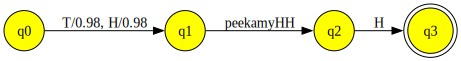

In [39]:
w_orpeekamyHH = Cn(half,wpeekamyHH)
w_orpeekamyHH.view() # 0.98 ~ 3/8

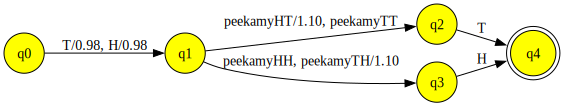

In [40]:
w_peekamy = Cn(half, EventwPeekAmy)
w_peekamy.view()